In [140]:
import pandas as pd
import numpy as np

# Datetime Data Type
- Base Python's datetime data type lets you work with time series data
    - datetime include both a date and time portion by default
    
- datatime.now() returns the current date and time, which is great for comparing time delts from the dates in the data to the present

In [4]:
from datetime import datetime

now = datetime.now()

now

print(type(now))

<class 'datetime.datetime'>


## Datetime 64

- NumPy's datetime64 data type lets you work with datetimes in DataFrames
- Pandas will treat dates as 'object' datatypes until converted to 'datetime64'

In [6]:
 # sales.astype({'date': 'datetime64', 'sales': 'int16'})

# Conversion Limitations

- .astype() method can convert strings to datetimes, but has some limitations:

1. Any values that Pandas can't correctly identify as dates will return an error
2. Ignoring the errors will return the Series as an 'object' data type, not datetime64

# To_Datetime

- pd.to_datetime() function is a more flexible option for converting datetimes

- can specify a format
- To convert using .to_datetime():
    - Pass the columns to convert
    - Specify errors='coerce' to convert errors to NaT
    - Use infer_datetime_format=True to let Pandas intelligently guess the date format of the text strings
    - Or use format= to specify the datetime format yourself, especially if Pandas can't guess correctly
    
    
shipping_dates['delivery_date'] = pd.to_datetime(
    shipping_dates['delivery date'],
    errors='coerce',
    infer_datetime_format=True,
    # format= '%Y-%M-%D',)

In [14]:
import pandas as pd

In [15]:
retail = pd.read_csv('../retail/retail_2016_2017.csv')

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [16]:
retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1054944 non-null  int64  
 1   date         1054944 non-null  object 
 2   store_nbr    1054944 non-null  int64  
 3   family       1054944 non-null  object 
 4   sales        1054944 non-null  float64
 5   onpromotion  1054944 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 167.8 MB


In [22]:
retail.loc[0, ['date']] = 'N/A'

In [23]:
# retail = retail.astype({'date':'datetime64'})

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,N/A,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [27]:
retail.assign(date=pd.to_datetime(retail['date'],
                                errors='coerce',
                                infer_datetime_format=True)).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054943 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


# Datetime Codes

- use these datetime codes to format dates or extract date components

1. Date
- %D : 07/14/2022 (zero-padded date)
- %Y : 2022 (year)
- %m : 07 (month)
- %B : July (full month name)
- %d : 14 (day of the month)
- % : 4 (weekday number)
- %A : Thursday (full weekday name)
- %U : 28 (week of the year)
- %j : 195 (day of the year)

2. Time
- %T : 16:36:30 (zero padded time 24 hr)
- %H : 16 (hour 24-hr format)
- %I : 04 (hour 12-hr format)
- %p : PM (AM or PM)
- %M : 36 (minute)
- %S : 30 (second)

# Formatting Datetimes

- use datetime codes with the .strftime() method to customize the datetime format

- string fomratted time = strftime
- .strftime() returns a string, so assigning the formatted datetime values to the DF column reverts the data type to an object

- .dt accessor lets you use the .strftime() on datetimes in Pandas DF

In [28]:
now

datetime.datetime(2023, 1, 27, 22, 44, 47, 351047)

In [29]:
now.strftime('%B %d, %Y')

'January 27, 2023'

In [32]:
# specify multiple datetime codes and punctuation to create custom formats
# reverts to object dtype
# sales.assign(date=sales['date'].dt.strftime('%Y-%B-%a'))

#  best dateformat, big, mid, small unit

In [34]:
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [35]:
retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


In [40]:
retail['date'].dt.strftime('%y-%b-%d').head()

0    16-Jan-01
1    16-Jan-01
2    16-Jan-01
3    16-Jan-01
4    16-Jan-01
Name: date, dtype: object

# Extracting Dateime components

- while you can use .strftime() method to extract datetime components, it's preferred to use th dedicated .dt accessors

- return date = dates.dt.date
- return year = dates.dt.year
- return month = date.dt.month
- return day of week = dates.dt.dayofweek
- return time = dates.dt.time
- return hour = date.dt.hour
- return minute = date.dt.minute
- return second = date.dt.second

In [46]:
retail.assign(
    year = retail['date'].dt.year)

,id,date,store_nbr,family,sales,onpromotion,year
0,1945944,2016-01-01,1,AUTOMOTIVE,0.000,0,2016
1,1945945,2016-01-01,1,BABY CARE,0.000,0,2016
2,1945946,2016-01-01,1,BEAUTY,0.000,0,2016
3,1945947,2016-01-01,1,BEVERAGES,0.000,0,2016
4,1945948,2016-01-01,1,BOOKS,0.000,0,2016
...,...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.133,0,2017
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017
1054941,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017


# Assignment 1: Date Formats and Date Parts

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

In [82]:
# read in transactions.csv 
transactions = pd.read_csv('../retail/transactions.csv', parse_dates=['date'])

transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [83]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [84]:
transactions['date'].max()

Timestamp('2017-08-15 00:00:00')

In [91]:
transactions.assign(
    time_diff = transactions['date'].max() - transactions['date'],
    year = transactions['date'].dt.year, 
    month = transactions['date'].dt.month, 
    dayofweek = transactions['date'].dt.dayofweek,
    date = transactions['date'].dt.strftime('%Y-%b-%d')
)

,date,store_nbr,transactions,time_diff,year,month,dayofweek
0,2013-Jan-01,25,770,1687 days,2013,1,1
1,2013-Jan-02,1,2111,1686 days,2013,1,2
2,2013-Jan-02,2,2358,1686 days,2013,1,2
3,2013-Jan-02,3,3487,1686 days,2013,1,2
4,2013-Jan-02,4,1922,1686 days,2013,1,2
...,...,...,...,...,...,...,...
83483,2017-Aug-15,50,2804,0 days,2017,8,1
83484,2017-Aug-15,51,1573,0 days,2017,8,1
83485,2017-Aug-15,52,2255,0 days,2017,8,1
83486,2017-Aug-15,53,932,0 days,2017,8,1


# Time Deltas

- Time deltas represent the amount or time, or difference, between two datetimes
- a time delra is returned when subtracting 2 datetime values

# To_Timedelta & Frequencies

- .to_timedelta() method lets you use frequencies to return timedelta values
- specify a number and frequency as unit


- Frequency -> Unit
- 'D' : Day
- 'W' : Week
- 'H' : Hour
- 'T' : Minute
- 'S' : Second

- 'M' : Month end
- 'Q' : Quarter end
- 'Y' : Year end


- Because M, Q and Y have differing lengths, they are sometimes known as 'anchored' frequencies, since thay are anchored to the end of calendar periods

- They can't be used in time delta arithmetic, but are useful for things like resampling

In [93]:
pd.to_timedelta(5, unit='D')

Timedelta('5 days 00:00:00')

In [94]:
pd.to_timedelta(5, unit='W')

Timedelta('35 days 00:00:00')

In [96]:
# pd.to_timedelta(5, unit='Y')

In [98]:
retail = retail.assign(birthday=pd.to_datetime('1990-01-01'))

retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1990-01-01
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1990-01-01
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1990-01-01
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1990-01-01
4,1945948,2016-01-01,1,BOOKS,0.0,0,1990-01-01


In [108]:
retail = retail.assign(age=(retail['date'] - retail['birthday']).dt.days / 365.25)

retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1990-01-01,25.998631
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1990-01-01,25.998631
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1990-01-01,25.998631
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1990-01-01,25.998631
4,1945948,2016-01-01,1,BOOKS,0.0,0,1990-01-01,25.998631


In [113]:
retail = retail.assign(
    retirement_date = retail['date'] + (pd.to_timedelta(365.25, unit='D') * 20))

retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age,retirement_date
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1990-01-01,25.998631,2036-01-01
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1990-01-01,25.998631,2036-01-01
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1990-01-01,25.998631,2036-01-01
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1990-01-01,25.998631,2036-01-01
4,1945948,2016-01-01,1,BOOKS,0.0,0,1990-01-01,25.998631,2036-01-01


# Assignment 2: Time Arithmetic


Hi again,

I just got word the the true max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

Thanks

In [114]:
# overwrite previous transactions df and convert date column

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

In [115]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [116]:
# recreate columns from assignment 1 using assign

transactions = transactions.assign(
    year=transactions["date"].dt.year,
    month=transactions["date"].dt.month,
    day_of_week=transactions["date"].dt.dayofweek,
    time_to_last_date=transactions["date"].max() - transactions["date"],
)

transactions.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days
1,2013-01-02,1,2111,2013,1,2,1686 days
2,2013-01-02,2,2358,2013,1,2,1686 days
3,2013-01-02,3,3487,2013,1,2,1686 days
4,2013-01-02,4,1922,2013,1,2,1686 days


In [125]:
transactions.assign(
    time_to_last_date = transactions['time_to_last_date'] + pd.to_timedelta(3, unit='W'),
    weeks_to_last_date = (lambda x : x['time_to_last_date'].dt.daysb / 7)
)

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1708 days,244.000000
1,2013-01-02,1,2111,2013,1,2,1707 days,243.857143
2,2013-01-02,2,2358,2013,1,2,1707 days,243.857143
3,2013-01-02,3,3487,2013,1,2,1707 days,243.857143
4,2013-01-02,4,1922,2013,1,2,1707 days,243.857143
...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,21 days,3.000000
83484,2017-08-15,51,1573,2017,8,1,21 days,3.000000
83485,2017-08-15,52,2255,2017,8,1,21 days,3.000000
83486,2017-08-15,53,932,2017,8,1,21 days,3.000000


# Time Series Indices

- Use datetime as the index to allow for intuitive slicing of your DataFrame
- Like with integers, make sure your time index is sorted or you will get add results.

- dates.loc['2022']
- dates.loc['2022':'2023']
- dates.loc['2022-01':'2022-02']
- dates.loc['2022-02-01':'2022-03-01']

In [128]:
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [130]:
# set index equal to date column
retail.index = retail['date']

In [131]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2016-01-01,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
2016-01-01,1945945,2016-01-01,1,BABY CARE,0.0,0
2016-01-01,1945946,2016-01-01,1,BEAUTY,0.0,0
2016-01-01,1945947,2016-01-01,1,BEVERAGES,0.0,0
2016-01-01,1945948,2016-01-01,1,BOOKS,0.0,0


In [134]:
retail.loc['2016':'2017-08-01']

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2016-01-01,1945944,2016-01-01,1,AUTOMOTIVE,0.000000,0
2016-01-01,1945945,2016-01-01,1,BABY CARE,0.000000,0
2016-01-01,1945946,2016-01-01,1,BEAUTY,0.000000,0
2016-01-01,1945947,2016-01-01,1,BEVERAGES,0.000000,0
2016-01-01,1945948,2016-01-01,1,BOOKS,0.000000,0
...,...,...,...,...,...,...
2017-08-01,2975935,2017-08-01,9,POULTRY,570.196000,0
2017-08-01,2975936,2017-08-01,9,PREPARED FOODS,50.462997,0
2017-08-01,2975937,2017-08-01,9,PRODUCE,2470.461000,151


# Missing Time Series Data

- time series data allows for methods for fixing missing data beyond .filna()

- Forward-filling - replaces missing values with value from the previous available date
    - dates.ffill()
- Back-filling - replaces missing values with value from next available date
    - dates.bfill()
- Interpolating data replaces missing values with a linear approximation based on the values from the previous and next available dates
    - dates = dates.astype('float64')
    - dates.interpolate()

In [143]:
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [147]:
retail_agg = retail.groupby(['date']).agg({'sales':'sum'}).round().iloc[:10]

retail_agg.iloc[1] = np.NaN
retail_agg.iloc[4:6] = np.NaN

retail_agg

,sales
date,
2016-01-01,16433.0
2016-01-02,NaN
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0


<AxesSubplot:xlabel='date'>

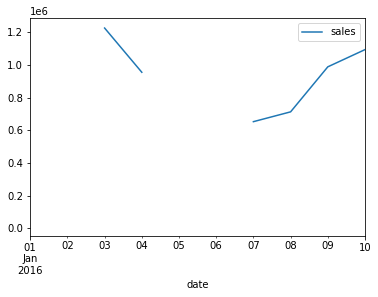

In [148]:
retail_agg.plot()

<AxesSubplot:xlabel='date'>

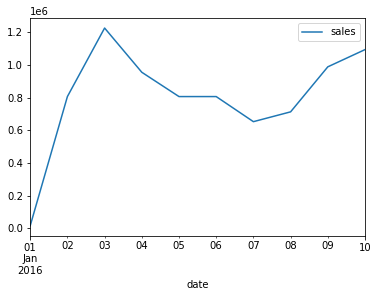

In [150]:
retail_agg.fillna(retail_agg['sales'].mean()).plot()

<AxesSubplot:xlabel='date'>

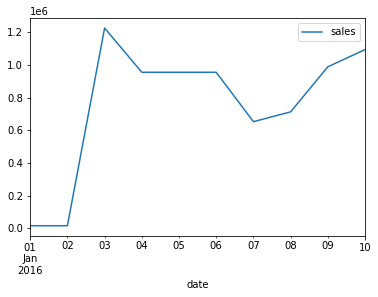

In [151]:
retail_agg.ffill().plot()

<AxesSubplot:xlabel='date'>

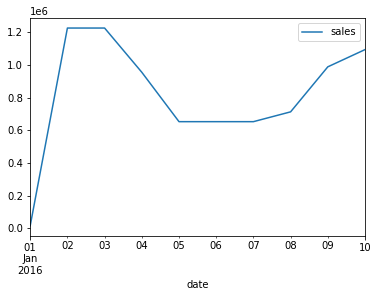

In [152]:
retail_agg.bfill().plot()

<AxesSubplot:xlabel='date'>

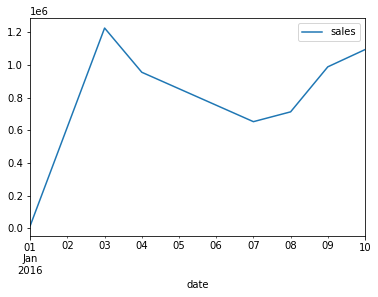

In [154]:
retail_agg.interpolate().round().plot()

# Assignment 3: Missing Time Series Data

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


In [155]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv("../retail/oil.csv", 
                  index_col="date", 
                  parse_dates=True)

In [159]:
# This is a synonym for datetime64

oil.index.dtype

dtype('<M8[ns]')

In [157]:
# mean of original series

oil.mean()

dcoilwtico    67.714366
dtype: float64

<AxesSubplot:xlabel='date'>

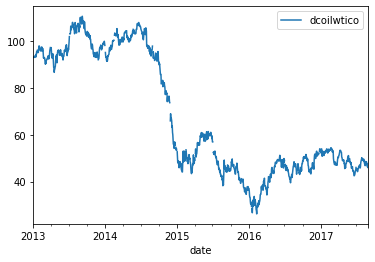

In [158]:
# original plot

oil.plot()

In [163]:
oil.ffill().mean()

dcoilwtico    67.671249
dtype: float64

In [164]:
oil.bfill().mean()

dcoilwtico    67.673325
dtype: float64

In [166]:
oil.interpolate().mean()

dcoilwtico    67.661824
dtype: float64

<AxesSubplot:xlabel='date'>

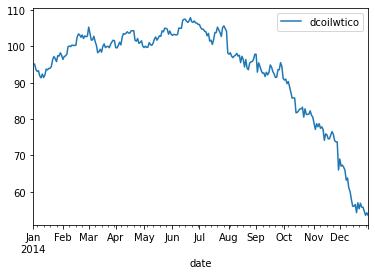

In [169]:
oil.loc['2014'].ffill().plot()

<AxesSubplot:xlabel='date'>

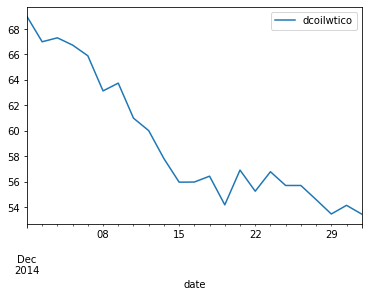

In [175]:
oil.loc['2014-12'].ffill().plot()

<AxesSubplot:xlabel='date'>

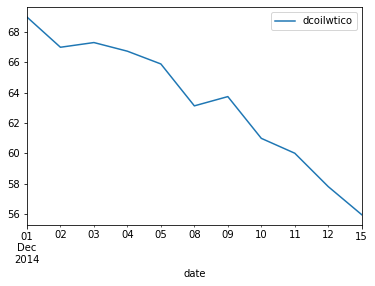

In [176]:
oil.loc['2014-12-01':'2014-12-15'].ffill().plot()

# Shifting Series

- You can shift a Series by a specified number of rows using the .shift() method
- This is helpful when working with time series to compare values against previous periods

In [189]:
retail_agg = retail.groupby(['date']).agg({'sales':'sum'}).round().iloc[1:10]

# compare sales today vs yesterday
retail_agg.assign(yesterday_sales = retail_agg['sales'].shift())

,sales,yesterday_sales
date,,
2016-01-02,1066677.0,NaN
2016-01-03,1226736.0,1066677.0
2016-01-04,955957.0,1226736.0
2016-01-05,835320.0,955957.0
2016-01-06,821686.0,835320.0
2016-01-07,653504.0,821686.0
2016-01-08,713608.0,653504.0
2016-01-09,989209.0,713608.0
2016-01-10,1094694.0,989209.0


In [193]:
# today sales - yesterday sales using shift
retail_agg.assign(
    yesterday_sales = ((retail_agg['sales'] / retail_agg['sales'].shift())-1) * 100)

,sales,yesterday_sales
date,,
2016-01-02,1066677.0,NaN
2016-01-03,1226736.0,15.005386
2016-01-04,955957.0,-22.073127
2016-01-05,835320.0,-12.619501
2016-01-06,821686.0,-1.632189
2016-01-07,653504.0,-20.467916
2016-01-08,713608.0,9.197189
2016-01-09,989209.0,38.620783
2016-01-10,1094694.0,10.663571


# Diff methods

- .diff() method calculates the difference between the values in a Series and those same values shifted a specified number of periods
- Useful in measuring absolute changes over time
- along with .shift(), both methods calcualte the difference between the current row and the previous one.
- .diff() calculates the difference from the previous row by default, but you can specify the number of rows as well.

In [200]:
retail_agg = retail.groupby(['date']).agg({'sales':'sum'}).round().iloc[1:10]

retail_agg.assign(diff_change = retail_agg['sales'].diff() / retail_agg['sales'].shift())

,sales,diff_change
date,,
2016-01-02,1066677.0,NaN
2016-01-03,1226736.0,0.150054
2016-01-04,955957.0,-0.220731
2016-01-05,835320.0,-0.126195
2016-01-06,821686.0,-0.016322
2016-01-07,653504.0,-0.204679
2016-01-08,713608.0,0.091972
2016-01-09,989209.0,0.386208
2016-01-10,1094694.0,0.106636


# Assignment 4: Shift and Diff

Hello,
I’m looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

In [244]:
transactions = pd.read_csv('../retail/transactions.csv', parse_dates= ['date'])

transactions_47 = transactions.loc[transactions['store_nbr'] == 47, ['date', 'transactions']]

transactions_47 = transactions_47.assign(
    year = transactions['date'].dt.year,
    month = transactions['date'].dt.month).groupby(['year','month']).sum()

<AxesSubplot:xlabel='month'>

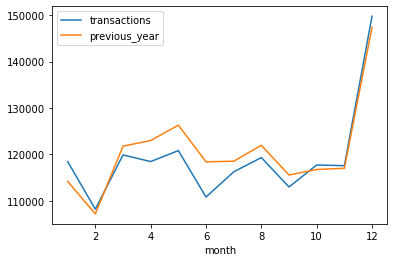

In [251]:
transactions_47 = transactions_47.assign(
    previous_year = transactions_47['transactions'].shift(12))

transactions_47.loc[2015].plot()

# Aggregating Time Series

- you can aggregate time series using the .groupby() method, but depending on use cae there are better methods

- sales.groupby(sales['date'].dt.month).agg({'sales':'sum'})
- sales.groupby(sales['year'].dt.month).agg({'sales':'sum'})

# Resampling Time Series

- Resampling is a special form of time series aggregation that modifies date indices and fills any gaps to create continuous date values
- dates.resample('M').sum() -> this modified the index and created consecutive month values from Jan 2022 to Jan 2023, even though only 4 months have data, and summed the values for each month using .sum()
- dates.resample('M').transform('sum')

In [252]:
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])

retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [253]:
retail.groupby([retail['date'].dt.year, retail['date'].dt.month]).agg('sum').round(2)

id  store_nbr        sales  onpromotion
date date                                                   
2016 1     109023650109    1519155  23977804.89       119578
     2     104752572111    1421145  21947408.80       183541
     3     114930124749    1519155  23131780.88       181790
     4     114128305830    1470150  25963025.10       215312
     5     120935040633    1519155  24779432.26       370019
     6     119939514750    1470150  22209218.58       285416
     7     126939956517    1519155  23462672.43       264605
     8     129991635081    1519155  22452414.32       271592
     9     128703960990    1470150  22417448.10       296361
     10    135996550965    1519155  24030389.82       370514
     11    134515169910    1470150  24642640.20       438358
     12    137373141510    1470150  29640287.58       517498
2017 1     144954704169    1519155  26328159.94       363428
     2     133549812396    1372140  23250112.37       297254
     3     150762737565    1519155  26704017.69       339291
     4     148805027910    1470150  25895308.49       371042
     5     156767653449    1519155  26911847.25       414646
     6     154616236830    1470150  25682822.12       394582
     7     162772569333    1519155  27011477.57       409128
     8      79856476425     735075  12433322.94       160278

In [258]:
retail.set_index('date').resample('M').sum().round(2)

,id,store_nbr,sales,onpromotion
date,,,,
2016-01-31,109023650109,1519155,23977804.89,119578
2016-02-29,104752572111,1421145,21947408.80,183541
2016-03-31,114930124749,1519155,23131780.88,181790
2016-04-30,114128305830,1470150,25963025.10,215312
2016-05-31,120935040633,1519155,24779432.26,370019
2016-06-30,119939514750,1470150,22209218.58,285416
2016-07-31,126939956517,1519155,23462672.43,264605
2016-08-31,129991635081,1519155,22452414.32,271592
2016-09-30,128703960990,1470150,22417448.10,296361


# Assignment 5: Resampling Time Series

Plot the monthly and yearly average oil prices.

In [259]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


<AxesSubplot:xlabel='date'>

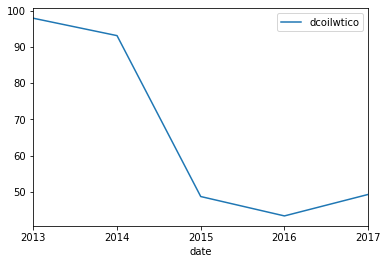

In [265]:
oil.resample('Y').mean().plot()

<AxesSubplot:xlabel='date'>

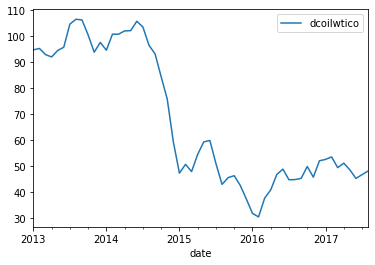

In [264]:
oil.resample('M').mean().plot()

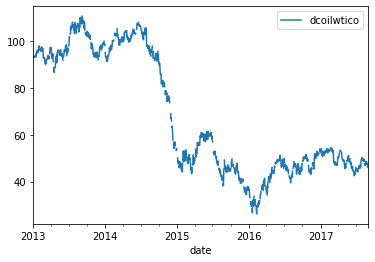

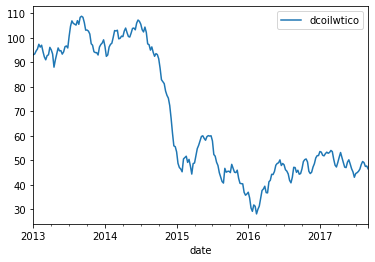

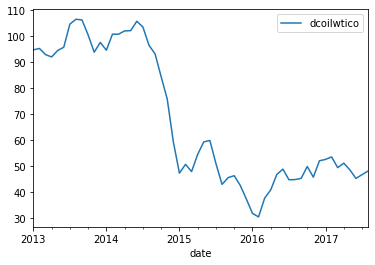

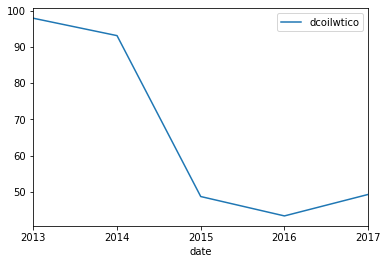

In [268]:
for period in ['D', 'W', 'M', 'A']:
    oil.resample(period).mean().plot()

# Rolling Aggregation

- Rolling aggregations let you perform calculations on shifting periods of time
- This can be used to calculate things like moving averages, which are helpful in reducing noise when plotting trends
- dates.rolling(2).mean()
- smooth out volatility

In [270]:
retail_daily = retail.set_index('date').loc[:, 'sales'].resample('D').sum().round(2)

retail_daily

date
2016-01-01      16433.39
2016-01-02    1066677.42
2016-01-03    1226735.72
2016-01-04     955956.88
2016-01-05     835320.44
                 ...    
2017-08-11     826373.72
2017-08-12     792630.54
2017-08-13     865639.68
2017-08-14     760922.41
2017-08-15     762661.94
Freq: D, Name: sales, Length: 593, dtype: float64

In [272]:
# average between two days
retail_daily.rolling(2).mean()


date
2016-01-01            NaN
2016-01-02     541555.405
2016-01-03    1146706.570
2016-01-04    1091346.300
2016-01-05     895638.660
                 ...     
2017-08-11     738880.315
2017-08-12     809502.130
2017-08-13     829135.110
2017-08-14     813281.045
2017-08-15     761792.175
Freq: D, Name: sales, Length: 593, dtype: float64

<AxesSubplot:xlabel='date'>

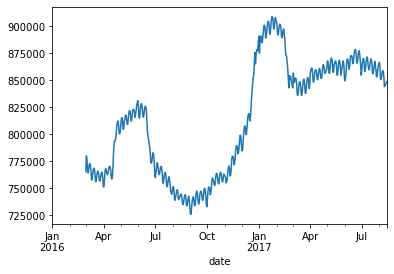

In [278]:
retail_daily.rolling(60).mean().plot()

# Assignment 6: Rolling Averages

Plot the 90-day moving average for transactions for store 47.

This will help remove some of the noise from our series.

Thanks!


In [279]:
# recreate transactions_47 with date as index 

transactions_47 = (transactions
                   .loc[transactions["store_nbr"]==47, ["date", "transactions"]]
                   .set_index("date"))

transactions_47.head()

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


<AxesSubplot:xlabel='date'>

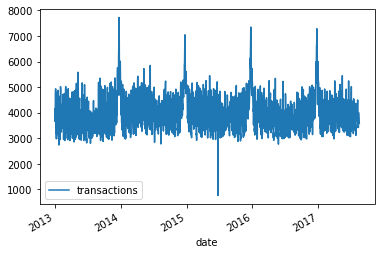

In [280]:
# original daily series for comparison

transactions_47.plot()

<AxesSubplot:xlabel='date'>

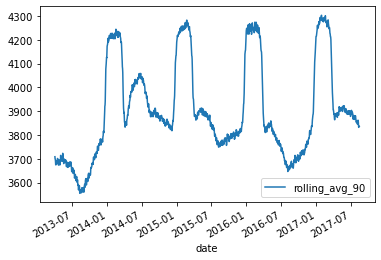

In [287]:
(transactions_47.assign(
    rolling_avg_90 = transactions_47.rolling(90).mean())
    .drop(['transactions'], axis=1)
    .plot())

# Key Takeaways

- Datetime64 data type lets you work with time series in Pandas
    - Conversion can be deceptively complicated, so use the .to_datetime() method to manage erros, or explicitly state the datetime format for Pandas to interpret it correctly
- Use datetime codes & accessors to format dates and extract date components
    - There are dozens of options, but you only need to memorize the common parts and formats for most business analysis scenarios - always reference the documentation if needed!
- Leverage datetime indices to slice time series data intuitively & efficiently
    - This also provides alternative methods for fixing missing data, like forward-filling, back-filling and interpolation.
- Shifting & aggregation methods let you perform time intelligence calculations
    - Shifting and differencing let you calculate period-over-period changes, grouping and resampling let you perform time series summaries, while rolling aggregations let you calculate things like moving averages